# Using Naive Bayes Classifier

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Reading and cleaning data

In [2]:
data = pd.read_csv(r"C:\Users\Aarushi Wagh\Downloads\code1\codes\isolation_forest_test_data.csv")
data.head()

data['label'] = data['label'].replace(['Inlier', 'Outlier'],(0,1))
data.head()

X = data[["app_cpu_apps.plugin_x","app_cpu_tc-qos-helper_x","app_cpu_ssh_x","running","free","used","cached","buffers"]].values
y = data['label'].values

### Splitting, oversampling and undersampling data

In [3]:
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, y,test_size = 0.25, stratify=y)
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train_gnb, y_train_gnb)
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_both, y_both = undersample.fit_resample(X_over, y_over)

print(Counter(y_train_gnb))
print(Counter(y_over))
print(Counter(y_both))

Counter({0: 3739, 1: 45})
Counter({0: 3739, 1: 1869})
Counter({0: 2336, 1: 1869})


### Performing GridSearch to select best parameters for the model

In [15]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
clf = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy')
clf.fit(X_both,y_both)
clf.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1.519911082952933e-07}

### Training the model

In [14]:
data_model_gnb = GaussianNB(var_smoothing = 8.111308307896872e-07)
data_model_gnb.fit(X_both, y_both.ravel())
y_predicted_gnb = data_model_gnb.predict(X_test_gnb)

### Performance metrics

In [16]:
a = cross_val_score(data_model_gnb, X_both, y_both.ravel(), cv = 10, scoring = "accuracy")
print(a)
print(a.mean())

[0.91686461 0.89073634 0.90498812 0.9239905  0.9216152  0.8952381
 0.92142857 0.91904762 0.89047619 0.92142857]
0.910581382196584


In [17]:
print(classification_report(y_test_gnb, y_predicted_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1247
           1       0.85      0.73      0.79        15

    accuracy                           1.00      1262
   macro avg       0.92      0.87      0.89      1262
weighted avg       1.00      1.00      1.00      1262



In [18]:
print(confusion_matrix(y_test_gnb, y_predicted_gnb))
print(precision_score(y_test_gnb, y_predicted_gnb))
print(recall_score(y_test_gnb, y_predicted_gnb))
print(f1_score(y_test_gnb, y_predicted_gnb))

[[1245    2]
 [   4   11]]
0.8461538461538461
0.7333333333333333
0.7857142857142856


### Visualizing the results of the model by plotting predicted values and actual values

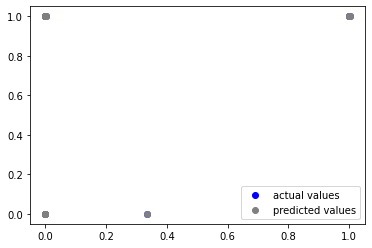

In [19]:
plt.scatter(X_test_gnb[:,2], y_test_gnb, color="blue", label="actual values")
plt.scatter(X_test_gnb[:,2], y_predicted_gnb, color="grey", label="predicted values")
plt.legend()